In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
np.random.seed(10)

In [ ]:
dataset_train=np.load('Dataset_Kernel_Train.npy')
dataset_test=np.load('Dataset_Kernel_Test.npy')

X_test =dataset_test[1:, :-1]
Y_test= dataset_test[1:,-1]
X_train =dataset_train[1:, :-1]
Y_train= dataset_train[1:,-1]
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler #scaling inputs
sc = StandardScaler()
X_train = sc.fit_transform(X_train)#fitting with train data
X_test  = sc.transform(X_test)#only applying transformation on test data, not fitting

In [ ]:
def plot_boundary(X, y, classifier,name):
    
    # Get limits of x and y for plotting the decision surface
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Get points at a distance of h between the above limits 
    h = .1    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    # Classify the all the points
    P = classifier.predict(temp).reshape(yy.shape)
    
    # Plot the decision boundary and margin   
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.savefig(name+'.png')
    plt.show()

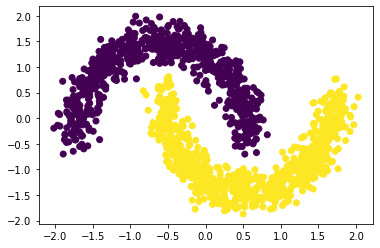

In [ ]:
#plot
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.savefig('Q3(a).png')
plt.show()

In [ ]:
#no tuning
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,Y_train)
print("Train accuracy: ",accuracy_score(Y_train, classifier.predict(X_train)))
print("Test accuracy: ",accuracy_score(Y_test, classifier.predict(X_test)))

Train accuracy:  0.9986657771847899
Test accuracy:  1.0


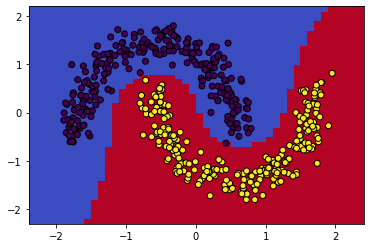

In [ ]:
plot_boundary(X_test, Y_test, classifier,"Q3(b)")#test data
plt.show()

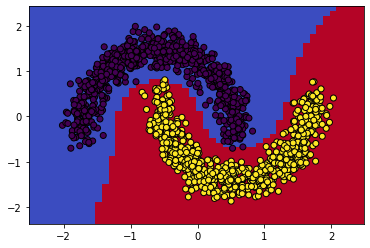

In [ ]:
plot_boundary(X_train, Y_train, classifier,"Q3(b)2")#train data
plt.show()

In [ ]:
#tuning
classifier = SVC(kernel='rbf',C=3,random_state=0)
classifier.fit(X_train,Y_train)
print("Train accuracy: ",accuracy_score(Y_train, classifier.predict(X_train)))
print("Test accuracy: ",accuracy_score(Y_test, classifier.predict(X_test)))

Train accuracy:  1.0
Test accuracy:  1.0


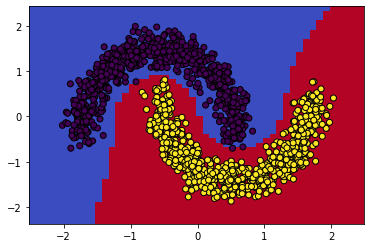

In [ ]:
plot_boundary(X_train, Y_train, classifier,"Q3(c)-1")#train data
plt.show()

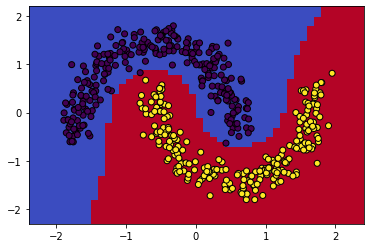

In [ ]:
plot_boundary(X_test, Y_test, classifier,"Q3(c)-2")#test data
plt.show()